# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option("display.max_columns",50)

# Importing a dataset and getting a View

In [2]:
train_df = pd.read_csv("F:/ETL/Project/HR_analitics/HR-Employee-Attrition-Table.csv")
train_df.head() # getting overview of first 5 rows

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
train_df.shape 

(1470, 35)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

here we can see there are no null values 

# Checking Uniques Values of Each Column

In [5]:
train_df.nunique() # check the unique values in each column

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
#Here EmployeeNumber refers to employee id which is a discrete column so we can drop this column
train_df = train_df.drop(labels = ["EmployeeNumber"],axis = 1)

In [7]:
# the columns which has less than 15 unique values can be treated as catogorical column
train_df[list(train_df.nunique()[train_df.nunique() < 15].index)] 

,Attrition,BusinessTravel,Department,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,1,Travel_Rarely,Sales,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,8,Y,Yes,3,1,80,0,0,1
1,0,Travel_Frequently,Research & Development,1,Life Sciences,1,3,Male,2,2,Research Scientist,2,Married,1,Y,No,4,4,80,1,3,3
2,1,Travel_Rarely,Research & Development,2,Other,1,4,Male,2,1,Laboratory Technician,3,Single,6,Y,Yes,3,2,80,0,3,3
3,0,Travel_Frequently,Research & Development,4,Life Sciences,1,4,Female,3,1,Research Scientist,3,Married,1,Y,Yes,3,3,80,0,3,3
4,0,Travel_Rarely,Research & Development,1,Medical,1,1,Male,3,1,Laboratory Technician,2,Married,9,Y,No,3,4,80,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,Travel_Frequently,Research & Development,2,Medical,1,3,Male,4,2,Laboratory Technician,4,Married,4,Y,No,3,3,80,1,3,3
1466,0,Travel_Rarely,Research & Development,1,Medical,1,4,Male,2,3,Healthcare Representative,1,Married,4,Y,No,3,1,80,1,5,3
1467,0,Travel_Rarely,Research & Development,3,Life Sciences,1,2,Male,4,2,Manufacturing Director,2,Married,1,Y,Yes,4,2,80,1,0,3
1468,0,Travel_Frequently,Sales,3,Medical,1,4,Male,2,2,Sales Executive,2,Married,2,Y,No,3,4,80,0,3,2


## seperate catagorical and continous columns

In [8]:
cat = list(train_df.nunique()[train_df.nunique() < 15].index)
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [9]:
# not every column can be treated like catgorical
cat.remove("NumCompaniesWorked")
cat.remove("TrainingTimesLastYear")
cat.remove("StandardHours")

In [10]:
print(cat) # list of all catagorical columns
len(cat)

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


19

In [11]:
# loop through all the columns and convert catogorical column to Object Datatype
for i in train_df.columns:
    if i in cat:
        train_df[i] = train_df[i].astype(str)

In [12]:
# use predefine catcon function to seperate catagorical and continous columns
from PM12 import catcon
cat,con = catcon(train_df)

In [13]:
print(con) # list of continuous columns
len(con)

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


15

# Exploratory Data Analytics

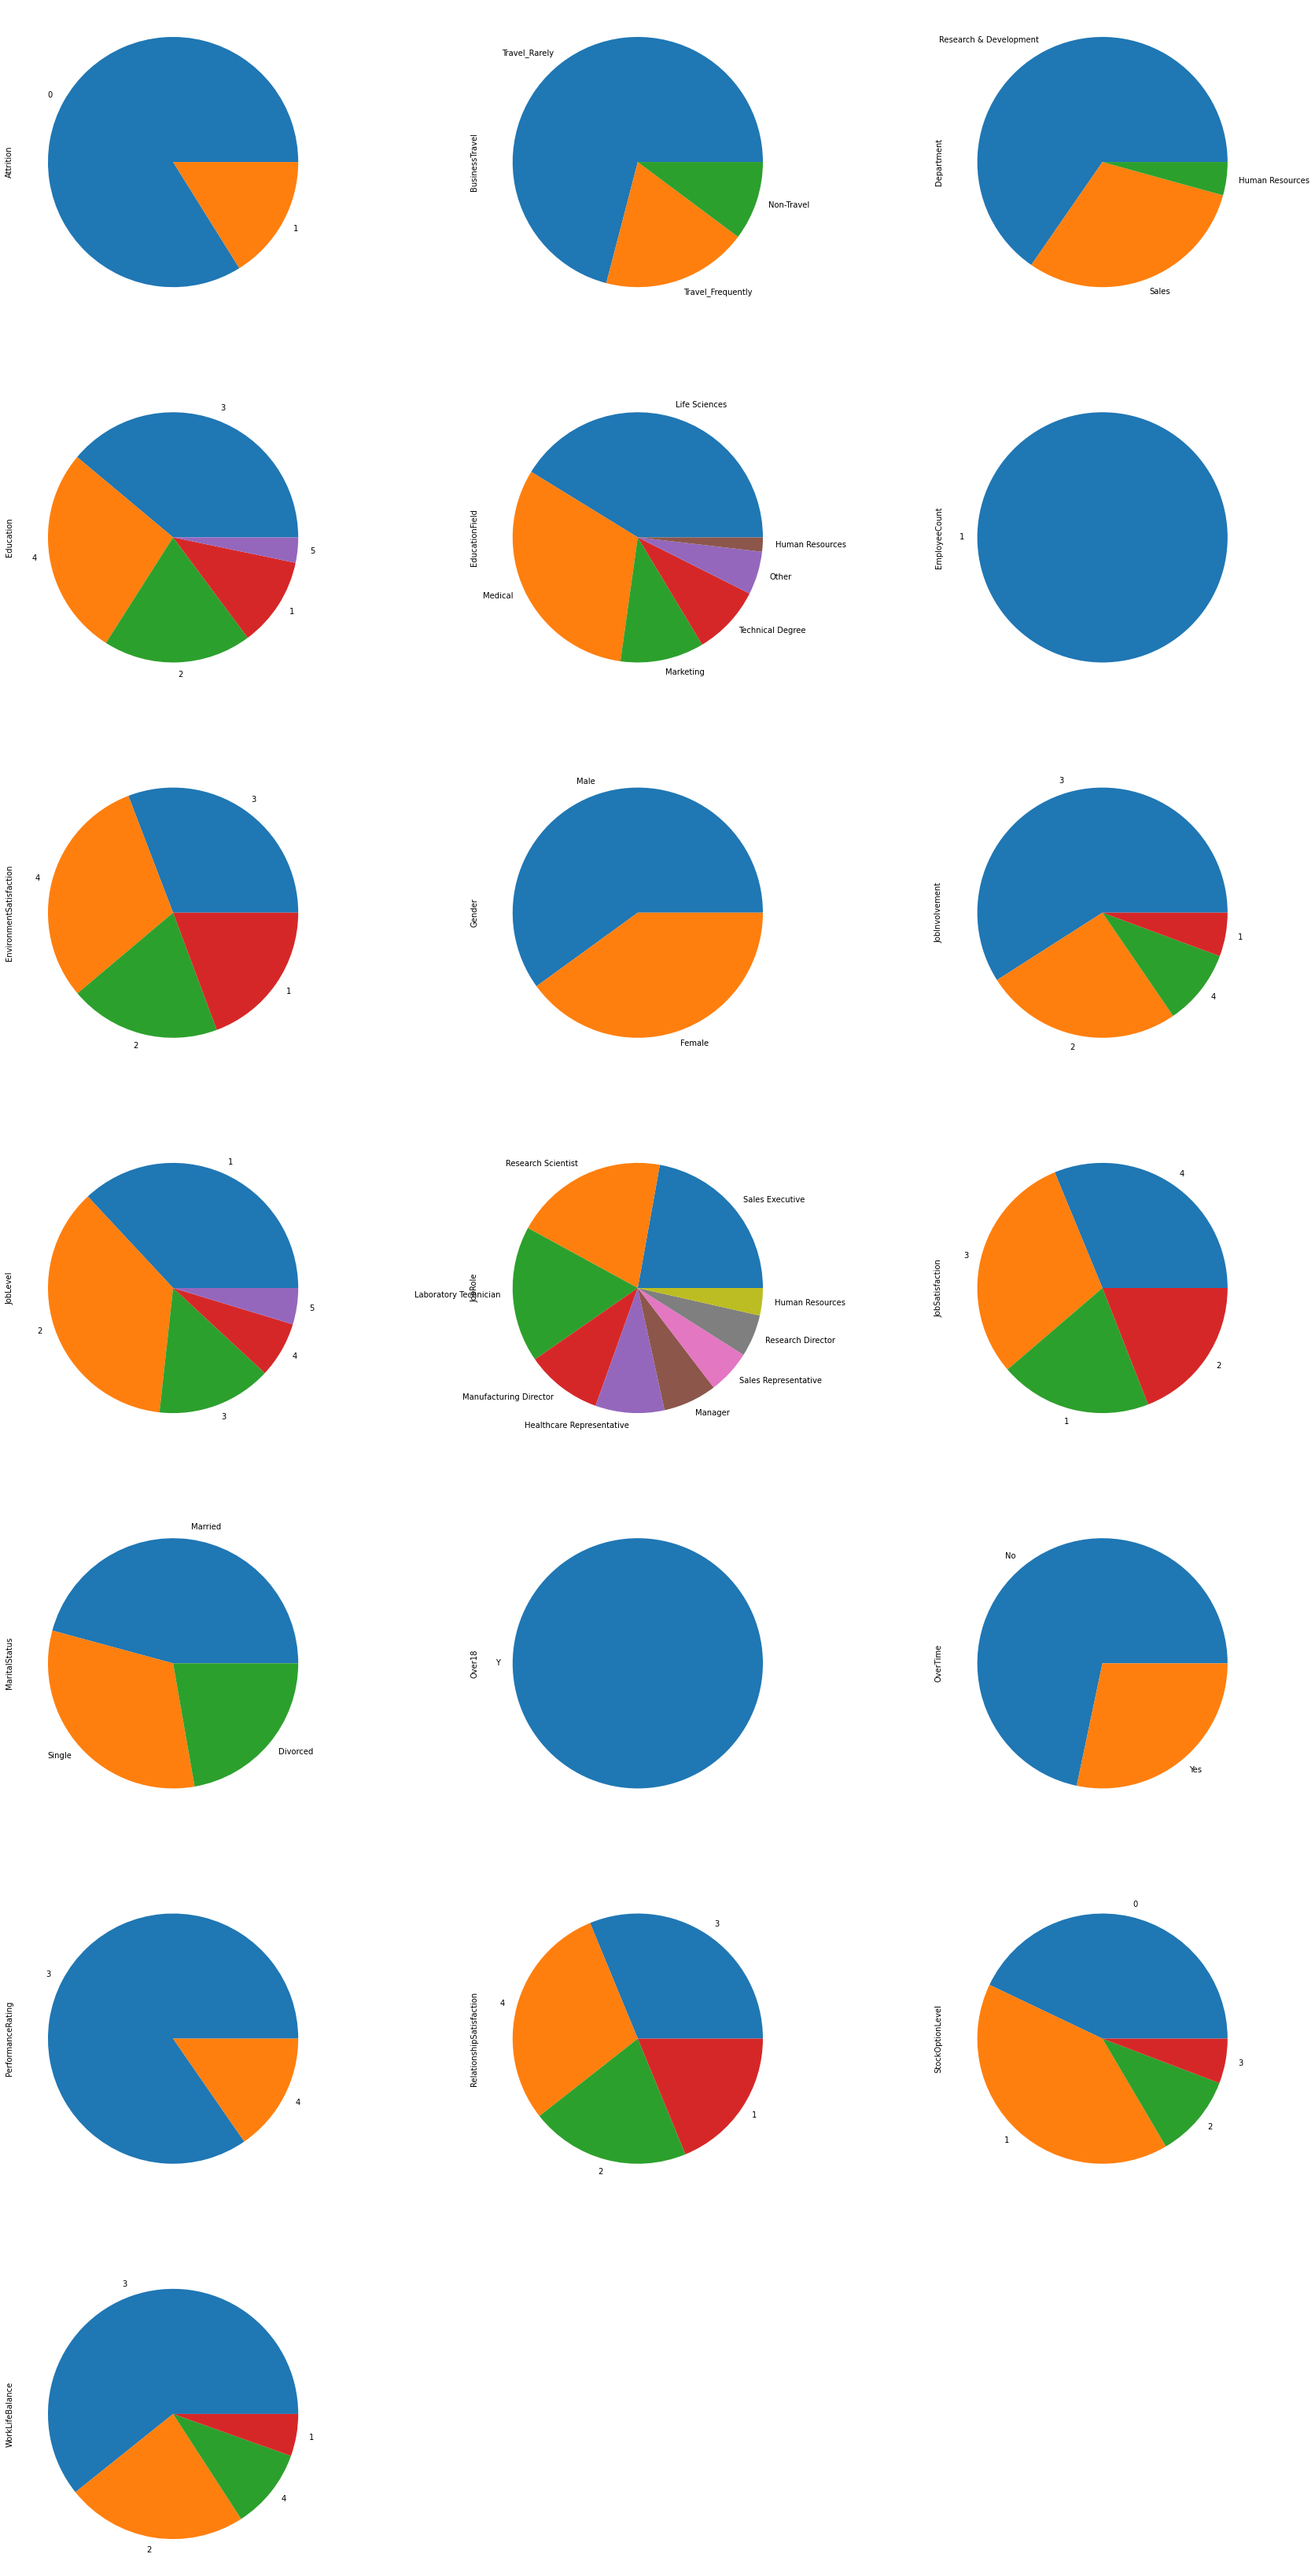

In [14]:
# Univariate Analysis on all categorical columns
plt.figure(figsize=(30,60))
count = 1
for i in cat:
    plt.subplot(7,3,count)
    train_df[i].value_counts().plot(kind = 'pie')
    count += 1

In [15]:
print(train_df["Over18"].value_counts())
print(train_df["EmployeeCount"].value_counts())

Y    1470
Name: Over18, dtype: int64
1    1470
Name: EmployeeCount, dtype: int64


In [16]:
#from above analysis we can see that EmployeeCount and Over18 column has only 1 constant value so we can drop the column
train_df = train_df.drop(labels = ["Over18","EmployeeCount"],axis = 1)

In [17]:
train_df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


In [18]:
train_df.corr()["MonthlyRate"]

Age                        0.028051
DailyRate                 -0.032182
DistanceFromHome           0.027473
HourlyRate                -0.015297
MonthlyIncome              0.034814
MonthlyRate                1.000000
NumCompaniesWorked         0.017521
PercentSalaryHike         -0.006429
StandardHours                   NaN
TotalWorkingYears          0.026442
TrainingTimesLastYear      0.001467
YearsAtCompany            -0.023655
YearsInCurrentRole        -0.012815
YearsSinceLastPromotion    0.001567
YearsWithCurrManager      -0.036746
Name: MonthlyRate, dtype: float64

In [19]:
#correlation of PercentSalaryHike , TrainingTimesLastYear , YearsSinceLastPromotion are way to low to consider
train_df["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [20]:
#StandardHours is a constant columns 
train_df = train_df.drop(labels = ["PercentSalaryHike","TrainingTimesLastYear","YearsSinceLastPromotion","StandardHours"],axis = 1)

In [21]:
train_df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,3,1,0,8,1,6,4,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,4,4,1,10,3,10,7,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,3,2,0,7,3,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,3,3,0,8,3,8,7,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,3,4,1,6,3,2,2,2


# Dealing With Outliers

In [22]:
from PM12 import catcon
cat,con = catcon(train_df)

In [23]:
#using Z-score method to deal with outliers
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1=pd.DataFrame(ss.fit_transform(train_df[con]),columns=con) #scaling data in range of -3 to 3

In [24]:
outliers=[]
for i in con:
    outliers.extend(df1[(df1[i]<-3)|(df1[i]>3)].index) # the row which has value less than -3 or more than 3 is Outlier

In [25]:
out=np.unique(outliers)
len(out)

58

In [26]:
train_df=train_df.drop(index=out,axis=0) # we can drop all those outliers

In [27]:
train_df.shape[0]

1412

In [28]:
train_df.index=range(0,train_df.shape[0],1) # after droping rows with outlier we have to reindex the dataframe 

In [29]:
train_df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,3,1,0,8,1,6,4,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,4,4,1,10,3,10,7,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,3,2,0,7,3,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,3,3,0,8,3,8,7,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,3,4,1,6,3,2,2,2


# Defining X-independent and Y dependent varaibles

In [30]:
X=train_df.drop(labels=["MonthlyRate"],axis=1)
Y=train_df[["MonthlyRate"]] #here we have to predict monthly rate

In [31]:
cat,con = catcon(X)

# Preprocessing 

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler_gb=MinMaxScaler() # here we use MinMaxScaler to scale our data in range 0 to 1
X1=pd.DataFrame(scaler_gb.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat]) # use use get dummies to create column for each category
Xnew=X1.join(X2)
X_new = Xnew

# Creating a OLS Model to check the best possible columns to use

In [33]:
# Split Dataset into training and testing set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=42)

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_error = round(mean_absolute_error(ytrain,tr_pred))
ts_error = round(mean_absolute_error(ytest,ts_pred))

print(tr_error/1000,ts_error/1000)

5.868 6.391


# Decesion Tree Model

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
ts_err = round(mean_absolute_error(ytest,ts_pred),2)
tr_err,ts_err

(0.0, 8378.99)

Here The model is overfit on training set but doesnt perform well on testing set. <br>
We will be using Pruning technique to deal with it

# Pruning Max Depth Of the Tree

In [36]:
tr = []
ts = []
for i in range(2,20,1):
    dtr = DecisionTreeRegressor(random_state = 42,max_depth=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_error = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_error = round(mean_absolute_error(ytest,ts_pred),2)
    tr.append(tr_error)
    ts.append(ts_error)

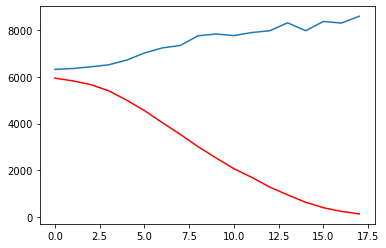

In [37]:
plt.plot(tr,c="red")
plt.plot(ts)

Here we can see we didn't get any better results using pruning technique <br>
Let's Use Minimum Sample Split

# Minimum Sample Split

In [38]:
tr = []
ts = []
for i in range(2,20,1):
    dtr = DecisionTreeRegressor(random_state = 42,min_samples_split=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_error = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_error = round(mean_absolute_error(ytest,ts_pred),2)
    tr.append(tr_error)
    ts.append(ts_error)

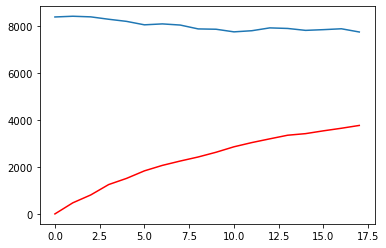

In [39]:
plt.plot(tr,c="red")
plt.plot(ts)

using Minumum Sample split we didn't get any better results either

# Minimum Sample Leaf

In [40]:
tr = []
ts = []
for i in range(2,20,1):
    dtr = DecisionTreeRegressor(random_state = 42,min_samples_leaf=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_error = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_error = round(mean_absolute_error(ytest,ts_pred),2)
    tr.append(tr_error)
    ts.append(ts_error)

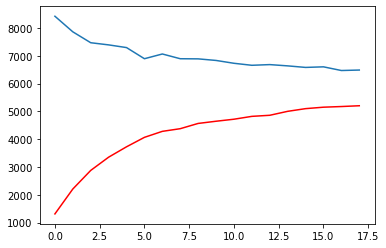

In [41]:
plt.plot(tr,c="red")
plt.plot(ts)

# Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=20,oob_score=True)
model = rfc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_error = round(mean_absolute_error(ytrain,tr_pred),2)
ts_error = round(mean_absolute_error(ytest,ts_pred),2)

In [43]:
tr_error,ts_error

(2420.94, 6504.07)

In [44]:
tr = []
ts = []
for i in range(2,20,1):
    rfc = RandomForestRegressor(n_estimators=20,oob_score=True)
    model = rfc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_error = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_error = round(mean_absolute_error(ytest,ts_pred),2)
    tr.append(tr_error)
    ts.append(ts_error)

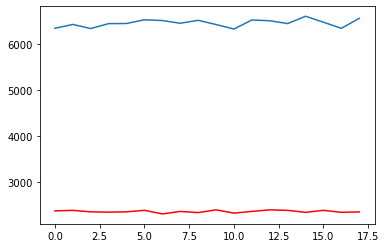

In [45]:
plt.plot(tr,c="red")
plt.plot(ts)

# Here We are getting Best results using Linear Regresion